<a href="https://colab.research.google.com/github/barthas1985/Stock_indicators_Warsaw_Stock_Exchange/blob/main/Biznesrdar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import requests
from bs4 import BeautifulSoup
import pandas as pd



headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36'}
# List for data that will be result of Looping Through Tabels.
wiersze = []
# Function get_many, that will extract/ parsing data from tabels (placed on website) accoridng to ticker name (companies listed on Warsaw Stock Exchange) and page number. 
def get_many(ticker, page):
  # Source of Data.
  url = f'https://www.biznesradar.pl/notowania-historyczne/{ticker},{page}' 
  # sending a request and return a content of the page.
  r = requests.get(url, headers = headers)
  # extracting text of content.
  soup = BeautifulSoup(r.text, 'html.parser')
  # searching for a table with requiered Data.
  tabela = soup.find('table', attrs = {'class':'qTableFull'})
  # serching for all Table rows
  ilosc_wierszy =tabela.findAll('tr')
  # looping through each row to extract data from each cell, and appending that data (from each cell) to list 'wiersze'.
  for wiersz in ilosc_wierszy:
    dane = wiersz.findAll('td')
  # Checking if Columns have any data
    if len(dane) == 0: 
        continue

    data = dane[0].getText()
    otwarcie = dane[1].getText()
    max = dane[2].getText()
    min = dane[3].getText()
    zamkniecie = dane[4].getText()
    wolumen = dane[5].getText()
    obrot = dane[6].getText()  
    wiersze.append([data, otwarcie, max, min, zamkniecie, wolumen, obrot])
  
  return
# Choose Compnies ticker name.
print('Enter A Ticker Name: ')
ticker = input()
ticker = ticker.upper()
print(ticker)




for x in range(1,4):
  get_many(ticker,x)



Enter A Ticker Name: 
ASBISC
ASBISC


In [ ]:
# Create a dataframe.
df = pd.DataFrame(wiersze, columns = ['Data','Otwarcie','Max','Min','Zamknięcie','Wolumen','Obrót'],)
df.sort_index(ascending=False, inplace = True)
#print(df.head())
# Data cleaning

#df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.set_index(pd.DatetimeIndex(df['Data'].values, dayfirst = True))
df['Data'] = pd.to_datetime(df['Data'],dayfirst = True)
#.dt.date
df['Otwarcie'] = df['Otwarcie'].astype(float)
df['Max'] = df['Max'].astype(float)
df['Min'] = df['Min'].astype(float)
df['Zamknięcie'] =df['Zamknięcie'].astype(float)
df['Wolumen'] = df['Wolumen'].str.replace(' ','')
df['Wolumen'] = df['Wolumen'].astype(int)
df['Obrót'] = df['Obrót'].str.replace(' ','')
df['Obrót'] = df['Obrót'].astype(int)
#df.set_index('Data', inplace=True)

# print(df.dtypes)
# print(df.info())
df.value_counts()


Data        Otwarcie  Max    Min    Zamknięcie  Wolumen  Obrót  
2021-09-13  25.35     25.60  24.95  25.50       140027   3540701    1
2022-01-28  17.78     17.78  16.70  16.98       200782   3432403    1
2022-02-01  17.20     17.20  16.78  17.00       132694   2253660    1
2022-02-02  17.00     18.10  17.00  17.88       289560   5118470    1
2022-02-03  18.00     18.10  17.62  17.70       170465   3034409    1
                                                                   ..
2021-11-24  23.10     23.45  22.60  23.00       84713    1949552    1
2021-11-25  23.00     23.15  22.70  22.95       67811    1549784    1
2021-11-26  22.70     22.70  21.50  22.00       313894   6925505    1
2021-11-29  22.00     22.25  20.80  21.75       260428   5603709    1
2022-04-19  11.70     11.96  11.33  11.60       120778   1396951    1
Length: 150, dtype: int64

In [ ]:
#df.Data.values

In [ ]:
# Exporting data frame in csv file.
df.to_excel('lista.xlsx')

In [ ]:
df = df.set_index(pd.DatetimeIndex(df['Data'].values))


In [ ]:
df.head(150)



,Data,Otwarcie,Max,Min,Zamknięcie,Wolumen,Obrót
2021-09-13,2021-09-13,25.35,25.60,24.95,25.50,140027,3540701
2021-09-14,2021-09-14,25.50,25.60,25.00,25.30,118127,2973582
2021-09-15,2021-09-15,25.10,26.85,25.10,25.70,269881,7038412
2021-09-16,2021-09-16,25.70,26.30,25.25,26.10,169491,4387342
2021-09-17,2021-09-17,26.10,27.25,26.10,27.25,378050,10141348
...,...,...,...,...,...,...,...
2022-04-11,2022-04-11,12.18,12.42,11.62,11.72,346214,4109228
2022-04-12,2022-04-12,11.64,11.72,11.22,11.26,466375,5316844
2022-04-13,2022-04-13,11.19,11.98,11.16,11.95,190041,2206244
2022-04-14,2022-04-14,12.00,12.20,11.60,11.77,101157,1191187


Create SMA and EMA ...( all below is a part that I am still learning:) ) SMA - Simple Moving Average, EMA- expotential moving average
\

In [ ]:
def SMA(data, period=30, column = 'Zamknięcie'):
  return data[column].rolling(window=period).mean()
def EMA(data, period = 20, column ='Zamknięcie'):
  return data[column].ewm(span = period, adjust = False).mean()



MACD Moving Average Convergence/Divergence


In [ ]:
def MACD(data, period_long = 26, period_short = 12, period_signal = 9, column = 'Zamknięcie'):
  # Short Term Expotential moving average 
  ShortEMA = EMA(data, period_short, column = column)
  # Long EMA
  LongEMA = EMA(data, period_long, column = column)
  #Calculate MACD
  data['MACD'] = ShortEMA - LongEMA
  #signal line
  data['Signal_Line'] = EMA(data, period_signal, column = 'MACD')
  return data

  

Create a function to compute the Relative Strength Index

In [ ]:
def RSI(data, period =14, column = 'Zamknięcie'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up<0]=0
  down [down>0] = 0
  data['up']= up
  data['down']= down
  AVG_Gain = SMA(data, period, column='up')
  AVG_Loss =  abs(SMA(data, period, column = 'down'))
  RS = AVG_Gain/AVG_Loss
  RSI = 100 - (100/(1+RS))
  data['RSI'] = RSI
  return data

#df.loc[(df.Zamknięcie>56)]


In [ ]:
df

,Data,Otwarcie,Max,Min,Zamknięcie,Wolumen,Obrót
2021-09-13,2021-09-13,25.35,25.60,24.95,25.50,140027,3540701
2021-09-14,2021-09-14,25.50,25.60,25.00,25.30,118127,2973582
2021-09-15,2021-09-15,25.10,26.85,25.10,25.70,269881,7038412
2021-09-16,2021-09-16,25.70,26.30,25.25,26.10,169491,4387342
2021-09-17,2021-09-17,26.10,27.25,26.10,27.25,378050,10141348
...,...,...,...,...,...,...,...
2022-04-11,2022-04-11,12.18,12.42,11.62,11.72,346214,4109228
2022-04-12,2022-04-12,11.64,11.72,11.22,11.26,466375,5316844
2022-04-13,2022-04-13,11.19,11.98,11.16,11.95,190041,2206244
2022-04-14,2022-04-14,12.00,12.20,11.60,11.77,101157,1191187


Create/add to the data set

In [ ]:
df[df.index.duplicated(keep = 'last' )]

,Data,Otwarcie,Max,Min,Zamknięcie,Wolumen,Obrót


In [ ]:
df.index.is_unique

True

In [ ]:
MACD(df)
RSI(df)
df['SMA']= SMA(df)
df['EMA']= EMA(df)

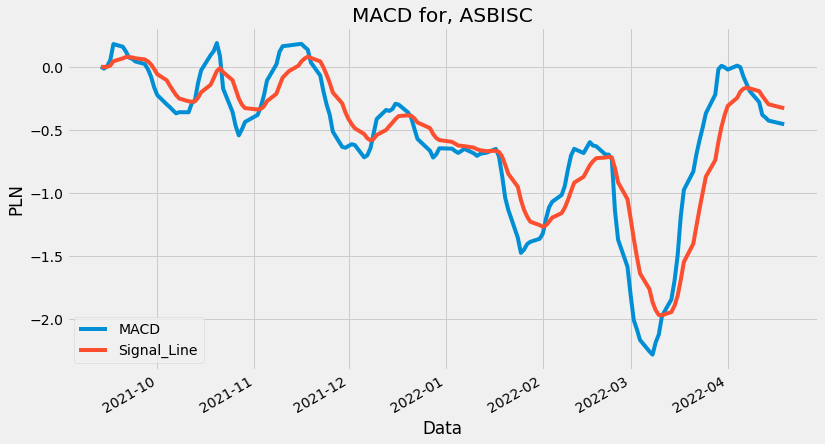

In [ ]:
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize= (12,7))
plt.title(f'MACD for, {ticker}')
plt.ylabel('PLN')
plt.xlabel('Data')
plt.show()

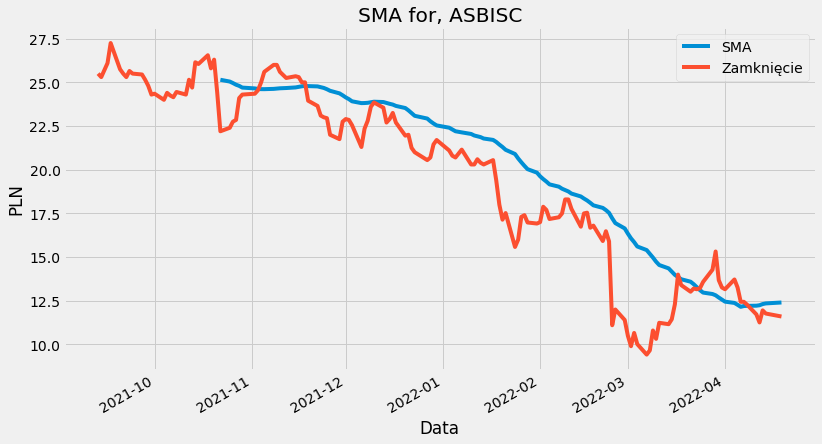

In [ ]:
column_list = ['SMA', 'Zamknięcie']
df[column_list].plot(figsize= (12,7))
plt.title(f'SMA for, {ticker}')
plt.ylabel('PLN')
plt.xlabel('Data')
plt.show()

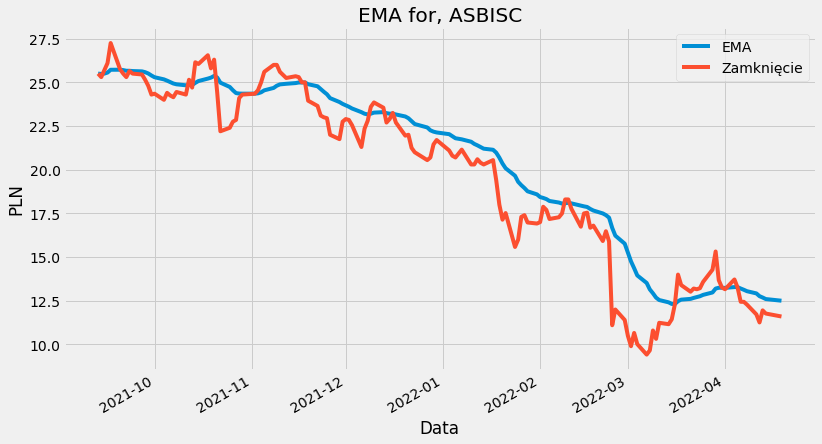

In [ ]:
column_list = ['EMA', 'Zamknięcie']
df[column_list].plot(figsize= (12,7))
plt.title(f'EMA for, {ticker}')
plt.ylabel('PLN')
plt.xlabel('Data')
plt.show()

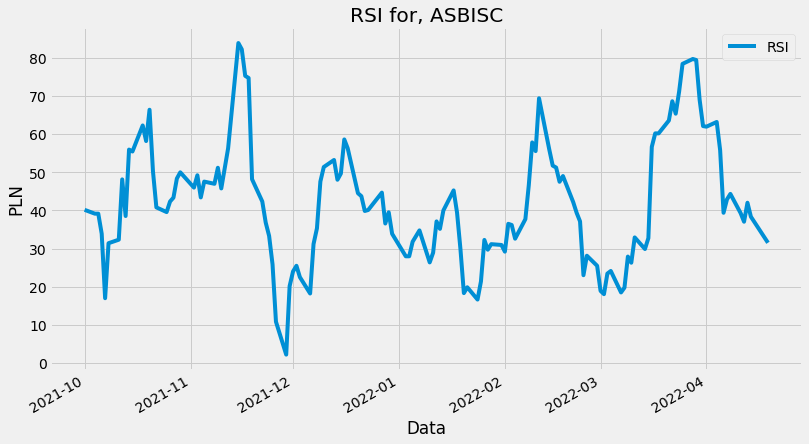

In [ ]:
column_list = ['RSI']
df[column_list].plot(figsize= (12,7))
plt.title(f'RSI for, {ticker}')
plt.ylabel('PLN')
plt.xlabel('Data')
plt.show()

In [ ]:
a = pd.DataFrame({'data': ['a','b','c','d','e']})
print(len(a))
for i in range(0, len(a)):
  z = np.array(a.data.iloc[0:i+1].tolist())
  print('z:', z)




5
z: ['a']
z: ['a' 'b']
z: ['a' 'b' 'c']
z: ['a' 'b' 'c' 'd']
z: ['a' 'b' 'c' 'd' 'e']
